<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº4
#### Nicolás Sewrjugin


# Introducción

En el procesamiento digital de señales, una de las cuestiones más comunes es la estimación de parámetros a partir de datos ruidosos. En particular, cuando analizamos senoidales con la presencia de ruido, suele ser de interés obtener de manera confiable su amplitud y su frecuencia, parámetros que determinan gran parte de su caracterización espectral.

La herramienta más utilizada para abordar este problema es la Transformada Discreta de Fourier (DFT), que nos permite observar cómo se distribuye la energía de la señal en el dominio de la frecuencia. Sin embargo, al trabajar con un número finito de muestras, la señal está siempre acompañada de una ventana temporal *w(n)*. La elección de esta ventana (o la ímplicita rectangular que acostumbra a actuar) afecta directamente el espectro observado, influyendo en la resolución y en la supresión de lóbulos laterales. Esto significa que, distintos tipos de ventanas, darán lugar a estimadores con comportamientos distintos en cuanto a sesgo y varianza.

En este contexto, los estimadores de amplitud y frecuencia pueden definirse a partir del espectro de la señal ventaneada *𝑋(Ω)*, donde *$Ω_0$* es la frecuencia nominal de interés:
\begin{equation}
\hat{a}_1 = \left| X_w(\Omega_0) \right| = \mathcal{F} \left\{ x(n) \cdot w_i(n) \right\}
\end{equation}
\begin{equation}
\hat{\Omega}_1 = \arg \max_\Omega \left\{ |X_w(\Omega)| \right\}
\end{equation}

El primero mide la magnitud espectral en el bin correspondiente, mientras que el segundo identifica la frecuencia en la que el espectro alcanza su máximo valor.

Dado que las observaciones se realizan en presencia de ruido, es de suma importancia evaluar el desempeño estadístico de los estimadores. Las dos métricas que se suelen utilizar son:
- **Sesgo**: mide la diferencia sistemática entre el valor esperado del estimador y el valor real del parámetro.
- **Varianza**: mide la dispersión de las estimaciones alrededor de su media.

Ambas pueden calcularse de manera empírica a partir de múltiples realizaciones de la señal, como por ejemplo:
\begin{equation}
s_a = \mathbb{E}\{\hat{a}_0\} - a_0
\end{equation}

\begin{equation}
v_a = \operatorname{var}\{\hat{a}_0\} = \mathbb{E}\left\{ \left( \hat{a}_0 - \mathbb{E}\{\hat{a}_0\} \right)^2 \right\}
\end{equation}

Teniendo en cuenta estas fórmulas, se puede apreciar que el sesgo negativo implica que el promedio de las estimaciones está por debajo del valor en concreto, es decir, las estimaciones subestiman la amplitud real. En cambio, para el sesgo positivo, el promedio de las estimaciones está por encima del valor requerido, es decir, las estimaciones sobreestiman la amplitud real.

En este análisis, la señal considerada está afectada por dos fuentes de aleatoriedad que impactan directamente en la precisión de los estimadores de amplitud y frecuencia (y, por ende, en los valores de sesgo y varianza nombrados). Por un lado, un corrimiento de frecuencia, es decir, una variable aleatoria uniforme *$f_r$* que desplaza la frecuencia central. Por otro lado, un ruido aditivo gaussiano *$n_a$*, que modela la incertidumbre que se observa fácilmente en el gráfico de la señal.  
\begin{equation}
f_r \sim \mathcal{U}(-2,2)
\end{equation}
\begin{equation}
n_a(n) \sim \mathcal{N}(0,\sigma^2)
\end{equation}

Para representar esta experiencia gráficamente, se emplearán histogramas, los cuales exhiben la distribución de un conjunto de datos, donde el eje horizontal muestra los intervalos de valores (bins) y el eje vertical indica la frecuencia o cantidad de ocurrencias de los datos dentro de cada intervalo. En este trabajo, el histograma resulta importante porque permite visualizar cómo se distribuyen los estimadores de amplitud o frecuencia a partir de múltiples realizaciones ruidosas de la señal. Al mostrar la dispersión de las estimaciones alrededor del valor verdadero, se puede observar de manera directa la varianza y posibles sesgos de cada ventana, lo que facilita comparar su desempeño y confiabilidad.

Finalmente, para analizar distintos escenarios de ruido y medirlo, resulta necesario detallar la relación señal-ruido (*SNR*), que expresa el cociente entre la potencia de la señal y la potencia del ruido:
\begin{equation}
\text{SNR (dB)} = 10 \log_{10} \left( \frac{P_{\text{señal}}}{P_{\text{ruido}}} \right)
\end{equation}

# Análisis y desarrollo

En esta experiencia, se empleó una señal senoidal ruidosa con las siguientes características:

\begin{equation}
x(n) = a_0 \cdot sen(\Omega_1 n) + n_a(n)
\end{equation}


\begin{equation}
a_0 = \sqrt2,
\quad
\Omega_1 = \Omega_0 + f_r \cdot \frac{2 \pi}{N},
\quad
\Omega_0 = \frac{\pi}{2}
\end{equation}

Se calculó el estimador de amplitud y frecuencia de esta señal para las ventanas: *rectangular*, *blackman-harris*, *flattop* y *hamming*. Además, se repitió el proceso con dos parametrizaciones de *SNR*, una de 10 *dB* y otra de 3 *dB*. 

Cabe destacar que se consideraron 200 realizaciones (muestras tomadas de $f_r$) de 1000 muestras para cada experimento.


### Estimadores de amplitud

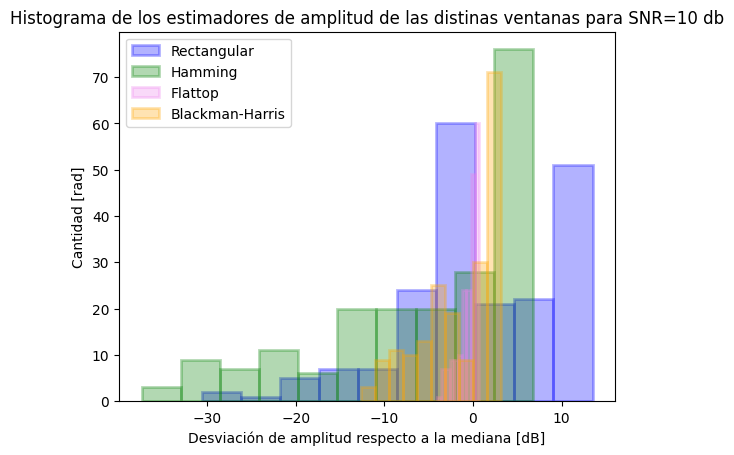

Estimadores de amplitud con 10 dB de SNR


,Ventana,Sesgo Amplitud,Varianza Amplitud
0,Rectangular,-1.145984,0.053386
1,Blackman-Harris,-1.248817,0.004565
2,Flattop,-1.275084,0.000265
3,Hamming,-1.236511,0.018775


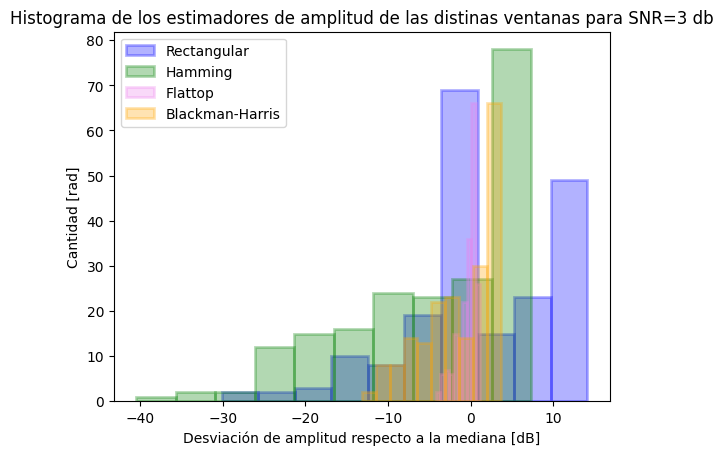

Estimadores de amplitud con 3 dB de SNR


,Ventana,Sesgo Amplitud,Varianza Amplitud
0,Rectangular,-1.147836,0.052798
1,Blackman-Harris,-1.249074,0.004486
2,Flattop,-1.275118,0.000294
3,Hamming,-1.236171,0.018179


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from numpy.fft import fft
from scipy.signal import windows
import pandas as pd
from IPython.display import display

N=1000
fs=N
df=fs/N
R=200
fr=np.random.uniform(-2,2,R)
a0 = np.sqrt(2)

def SNR_varianza(señal, SNR_db):
    # Potencia de la señal
    P_señal = np.mean(señal**2, axis=0)

    # Varianza del ruido
    Rvar = P_señal / (10**(SNR_db / 10))

    return Rvar

t = np.arange(0, N)*(1/fs)

t = t.reshape(-1, 1)
t_R = np.tile(t, (1,R))
f_R = np.tile(fr, (N, 1))
s_m = a0*np.sin(t_R*2*np.pi*((N/4) + f_R))

#SNR 10 db
Rvar = SNR_varianza(s_m, 10)  #SNR = 10 dB
Na = np.random.normal(0, np.sqrt(Rvar).reshape(1,-1), (N, R))
x_m = s_m + Na

X_m = np.fft.fft(x_m, axis = 0, n = N)*(1/N)

#Rectangular implícita
a1 = np.abs(X_m[N//4,:])
a1_db = 10*np.log10((a1**2)*2)

#Ventanas 

#Blackman-Harris
wb = windows.blackmanharris(N)
wb = wb.reshape(-1, 1)
xblack_m = x_m*wb

Xblack_m = np.fft.fft(xblack_m, axis = 0, n = N)*(1/N)
a2 = np.abs(Xblack_m[N//4,:])
a2_db = 10*np.log10((a2**2)*2)

#Flattop
wfl = windows.flattop(N)
wfl = wfl.reshape(-1, 1)
xfl_m = x_m*wfl

Xfl_m = np.fft.fft(xfl_m, axis = 0, n = N)*(1/N)
a3 = np.abs(Xfl_m[N//4,:])
a3_db = 10*np.log10((a3**2)*2)

#Hamming
wh = windows.hamming(N)
wh = wh.reshape(-1, 1)
xh_m = x_m*wh

Xh_m = np.fft.fft(xh_m, axis = 0, n = N)*(1/N)
a4 = np.abs(Xh_m[N//4,:])
a4_db = 10*np.log10((a4**2)*2)

plt.figure()
transp = 0.3
bins = 10
contorno = 2
plt.hist(a1_db-np.median(a1_db),label='Rectangular', color = 'blue', alpha = transp, bins = bins, edgecolor = 'blue', linewidth=contorno)
plt.hist(a4_db-np.median(a4_db),label='Hamming', color = 'green', alpha = transp, bins = bins, edgecolor = 'green', linewidth=contorno)
plt.hist(a3_db-np.median(a3_db),label='Flattop', color = 'violet', alpha = transp, bins = bins, edgecolor = 'violet', linewidth=contorno)
plt.hist(a2_db-np.median(a2_db),label='Blackman-Harris', color = 'orange', alpha = transp, bins = bins, edgecolor = 'orange', linewidth=contorno)
plt.title("Histograma de los estimadores de amplitud de las distinas ventanas para SNR=10 db")
plt.xlabel("Desviación de amplitud respecto a la mediana [dB]")
plt.ylabel("Cantidad [rad]")
plt.legend()
plt.show()

estimadores = {
    "Rectangular": a1,
    "Blackman-Harris": a2,
    "Flattop": a3,
    "Hamming": a4,
}

sesgo = {}
varianza = {}

for ventana, datos in estimadores.items():
    sesgo[ventana] = np.mean(datos) - a0
    varianza[ventana] = np.var(datos)
    
data = []
for ventana in estimadores.keys():
    data.append({
        "Ventana": ventana,
        "Sesgo Amplitud": sesgo[ventana],
        "Varianza Amplitud": varianza[ventana]
    })

tabla = pd.DataFrame(data)
print("Estimadores de amplitud con 10 dB de SNR")
tabla.style.set_table_styles(
    [{'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)
display(tabla)

#SNR de 3 db
Rvar2 = SNR_varianza(s_m, 3)  #SNR = 10 dB
Na2 = np.random.normal(0, np.sqrt(Rvar2).reshape(1,-1), (N, R))
x_m2 = s_m + Na2

X_m2 = np.fft.fft(x_m2, axis = 0, n = N)*(1/N)

#Rectangular implícita
a12 = np.abs(X_m2[N//4,:])
a12_db = 10*np.log10((a12**2)*2)

#Ventanas 

#Blackman-Harris
xblack2_m = x_m2*wb

Xblack2_m = np.fft.fft(xblack2_m, axis = 0, n = N)*(1/N)
a22 = np.abs(Xblack2_m[N//4,:])
a22_db = 10*np.log10((a22**2)*2)

#Flattop
xfl2_m = x_m2*wfl

Xfl2_m = np.fft.fft(xfl2_m, axis = 0, n = N)*(1/N)
a32 = np.abs(Xfl2_m[N//4,:])
a32_db = 10*np.log10((a32**2)*2)

#Hamming
xh2_m = x_m2*wh

Xh2_m = np.fft.fft(xh2_m, axis = 0, n = N)*(1/N)
a42 = np.abs(Xh2_m[N//4,:])
a42_db = 10*np.log10((a42**2)*2)

plt.figure()
transp = 0.3
bins = 10
contorno = 2
plt.hist(a12_db-np.median(a12_db),label='Rectangular', color = 'blue', alpha = transp, bins = bins, edgecolor = 'blue', linewidth=contorno)
plt.hist(a42_db-np.median(a42_db),label='Hamming', color = 'green', alpha = transp, bins = bins, edgecolor = 'green', linewidth=contorno)
plt.hist(a32_db-np.median(a32_db),label='Flattop', color = 'violet', alpha = transp, bins = bins, edgecolor = 'violet', linewidth=contorno)
plt.hist(a22_db-np.median(a22_db),label='Blackman-Harris', color = 'orange', alpha = transp, bins = bins, edgecolor = 'orange', linewidth=contorno)
plt.title("Histograma de los estimadores de amplitud de las distinas ventanas para SNR=3 db")
plt.xlabel("Desviación de amplitud respecto a la mediana [dB]")
plt.ylabel("Cantidad [rad]")
plt.legend()
plt.show()

estimadores2 = {
    "Rectangular": a12,
    "Blackman-Harris": a22,
    "Flattop": a32,
    "Hamming": a42,
}

sesgo2 = {}
varianza2 = {}

for ventana2, datos2 in estimadores2.items():
    sesgo2[ventana2] = np.mean(datos2) - a0
    varianza2[ventana2] = np.var(datos2)
    
data2 = []
for ventana2 in estimadores2.keys():
    data2.append({
        "Ventana": ventana2,
        "Sesgo Amplitud": sesgo2[ventana2],
        "Varianza Amplitud": varianza2[ventana2]
    })

tabla2 = pd.DataFrame(data2)
print("Estimadores de amplitud con 3 dB de SNR")
tabla2.style.set_table_styles(
    [{'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)
display(tabla2)

En ambas tablas de varianza y sesgo (con *SNR* de 3 *db* y 10 *db*), se puede obtener el mismo análisis: 

- La ventana **rectangular** es la que presenta el menor sesgo, es decir, en promedio estima la amplitud más cercana al valor real. Sin embargo, el costo de ese beneficio es una varianza más alta, lo que implica que sus estimaciones son muy dispersas debido al fuerte desparramo.

- En cuanto a la ventana **Flattop**, esta tiene el mayor sesgo, subestimando más la amplitud, pero logra la varianza más baja de todas con gran diferencia, lo cual indica que todas las realizaciones se agrupan muy cerca del valor medio, mostrando la mayor estabilidad (pero aunque muy corrida del valor verdadero).

- La ventana **Blackman-Harris** también sacrifica algo de sesgo, a cambio de una varianza muy reducida. Esto sugiere un excelente compromiso cuando se busca estabilidad con poca dispersión, no tan extrema como Flattop.

- La **Hamming** queda en término medio, con sesgo más moderado y varianza intermedia, es decir, más balanceada.

En el contexto de la estimación estadística, no existe un estimador que sea objetivamente mejor en todos los sentidos, ya que se debe balancear entre sesgo y varianza. Sin embargo, en muchos casos, es preferible utilizar un estimador ligeramente sesgado pero con baja varianza, en lugar de un estimador con sesgo mínimo que presente una varianza elevada. Esto se debe a que el sesgo es un desplazamiento sistemático que, al ser conocido o estimable, puede corregirse para obtener un estimador insesgado (de hecho, así se calibran los instrumentos de medición). En cambio, la varianza refleja la dispersión aleatoria de las mediciones debida al ruido, la cual no puede eliminarse mediante una simple corrección determinística.

Aplicando este criterio a las ventanas analizadas, se observa que ventanas como **Flattop** o **Blackman-Harris**, aunque muestran un sesgo mayor, presentan una varianza significativamente menor, lo que hace que las estimaciones sean más consistentes y predecibles. Con una corrección del sesgo, estos estimadores pueden aproximarse muy bien al valor real de la amplitud. Por otro lado, ventanas como **Rectangular** o **Hamming**, que inicialmente tienen menor sesgo, muestran varianzas más altas, lo que provoca que cada medición individual pueda desviarse considerablemente del valor real, dificultando la obtención de resultados más precisos.

Al representar los histogramas en *dB*, y restando la mediana de cada conjunto de estimaciones, se está centrando los datos alrededor de cero. Esto permite observar la dispersión de las estimaciones respecto a su valor central, es decir, cómo fluctúa cada estimador alrededor de su valor típico. Al centrar los datos de esta manera, el valor absoluto de la amplitud en *dB* no tiene importancia, sino que se puede comparar directamente la consistencia de los distintos estimadores y el ancho de la distribución (varianza). Como se observa en el histograma, la **Flattop** tiene un histograma muy estrecho y casi concentrado en cero, lo que indica baja varianza (estimaciones muy consistentes, aunque sesgadas). La **Rectangular** y la **Hamming** presentan histogramas más anchos, lo que indica mayor varianza (las estimaciones fluctúan más alrededor de la mediana). Mientras que, la **Blackman-Harris**, es más estrecha que la *Hamming* y la *Rectangular*, pero no tan extrema como la *Flattop* (ocupando un lugar más intermedio).

Por último, los resultados evidencian que, al disminuir la *SNR* de 10 dB a 3 dB, los valores de sesgo y varianza de los distintos estimadores no cambian de manera significativa. Esto se debe a que, con los parámetros utilizados (número de muestras y número de realizaciones), el efecto del ruido es relativamente pequeño frente a la magnitud de la señal, por lo que la dispersión de las estimaciones permanecen casi constante. En otras palabras, aunque la *SNR* es menor, la consistencia de los estimadores se mantiene, reflejando que la varianza intrínseca de cada ventana domina sobre la contribución del ruido en este rango de *SNR*.

### Estimadores de frecuencia

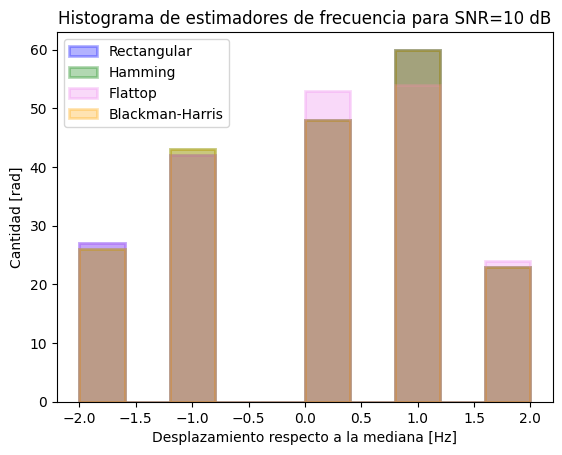

Estimadores de frecuencia con 10 dB de SNR


,Ventana,Sesgo Frecuencia,Varianza Frecuencia
0,Rectangular,0.050,1.507500
1,Blackman-Harris,0.055,1.491975
2,Flattop,0.030,1.499100
3,Hamming,0.055,1.491975


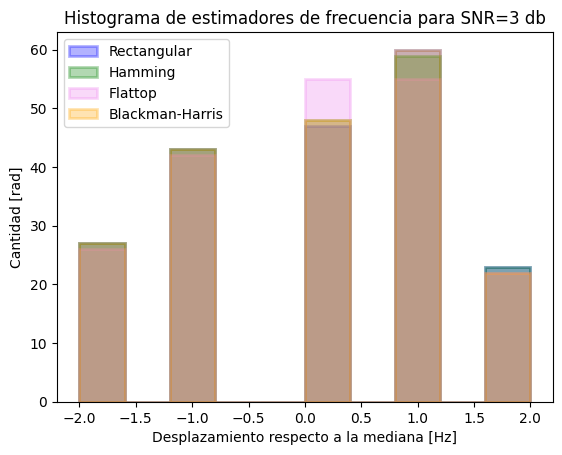

Estimadores de frecuencia con 3 dB de SNR


,Ventana,Sesgo Frecuencia,Varianza Frecuencia
0,Rectangular,0.045,1.512975
1,Blackman-Harris,0.035,1.493775
2,Flattop,0.025,1.444375
3,Hamming,0.040,1.508400


In [3]:
# SNR de 10 dB
freqs = np.fft.fftfreq(N, 1/fs)

#Frecuencia solo positiva
freq_estimadores = {
    "Rectangular": freqs[np.argmax(np.abs(X_m[:N//2,:]), axis=0)],
    "Blackman-Harris": freqs[np.argmax(np.abs(Xblack_m[:N//2,:]), axis=0)],
    "Flattop": freqs[np.argmax(np.abs(Xfl_m[:N//2,:]), axis=0)],
    "Hamming": freqs[np.argmax(np.abs(Xh_m[:N//2,:]), axis=0)],
}

plt.figure()
transp = 0.3
bins = 10
contorno = 2
plt.hist(freq_estimadores["Rectangular"]-np.median(freq_estimadores["Rectangular"]), label='Rectangular', color='blue', alpha=transp, bins=bins, edgecolor='blue', linewidth=contorno)
plt.hist(freq_estimadores["Hamming"]-np.median(freq_estimadores["Hamming"]), label='Hamming', color='green', alpha=transp, bins=bins, edgecolor='green', linewidth=contorno)
plt.hist(freq_estimadores["Flattop"]-np.median(freq_estimadores["Flattop"]), label='Flattop', color='violet', alpha=transp, bins=bins, edgecolor='violet', linewidth=contorno)
plt.hist(freq_estimadores["Blackman-Harris"]-np.median(freq_estimadores["Blackman-Harris"]), label='Blackman-Harris', color='orange', alpha=transp, bins=bins, edgecolor='orange', linewidth=contorno)
plt.title("Histograma de estimadores de frecuencia para SNR=10 dB")
plt.xlabel("Desplazamiento respecto a la mediana [Hz]")
plt.ylabel("Cantidad [rad]")
plt.legend()
plt.show()

# Calcular sesgo y varianza de frecuencia
sesgo_f = {}
varianza_f = {}
f0 = (N/4)  # frecuencia nominal en Hz de omega1
for ventana, datos in freq_estimadores.items():
    sesgo_f[ventana] = np.mean(datos) - f0
    varianza_f[ventana] = np.var(datos)

data_f = []
for ventana in freq_estimadores.keys():
    data_f.append({
        "Ventana": ventana,
        "Sesgo Frecuencia": sesgo_f[ventana],
        "Varianza Frecuencia": varianza_f[ventana]
    })

tabla_f = pd.DataFrame(data_f)
print("Estimadores de frecuencia con 10 dB de SNR")
tabla_f.style.set_table_styles(
    [{'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)
display(tabla_f)

# SNR de 3 dB
freq_estimadores2 = {
    "Rectangular": freqs[np.argmax(np.abs(X_m2[:N//2,:]), axis=0)],
    "Blackman-Harris": freqs[np.argmax(np.abs(Xblack2_m[:N//2,:]), axis=0)],
    "Flattop": freqs[np.argmax(np.abs(Xfl2_m[:N//2,:]), axis=0)],
    "Hamming": freqs[np.argmax(np.abs(Xh2_m[:N//2,:]), axis=0)],
}

plt.figure()
transp = 0.3
bins = 10
contorno = 2
plt.hist(freq_estimadores2["Rectangular"]-np.median(freq_estimadores2["Rectangular"]), label='Rectangular', color='blue', alpha=transp, bins=bins, edgecolor='blue', linewidth=contorno)
plt.hist(freq_estimadores2["Hamming"]-np.median(freq_estimadores2["Hamming"]), label='Hamming', color='green', alpha=transp, bins=bins, edgecolor='green', linewidth=contorno)
plt.hist(freq_estimadores2["Flattop"]-np.median(freq_estimadores2["Flattop"]), label='Flattop', color='violet', alpha=transp, bins=bins, edgecolor='violet', linewidth=contorno)
plt.hist(freq_estimadores2["Blackman-Harris"]-np.median(freq_estimadores2["Blackman-Harris"]), label='Blackman-Harris', color='orange', alpha=transp, bins=bins, edgecolor='orange', linewidth=contorno)
plt.title("Histograma de estimadores de frecuencia para SNR=3 db")
plt.xlabel("Desplazamiento respecto a la mediana [Hz]")
plt.ylabel("Cantidad [rad]")
plt.legend()
plt.show()

sesgo_f2 = {}
varianza_f2 = {}
for ventana2, datos2 in freq_estimadores2.items():
    sesgo_f2[ventana2] = np.mean(datos2) - f0
    varianza_f2[ventana2] = np.var(datos2)

data_f2 = []
for ventana2 in freq_estimadores2.keys():
    data_f2.append({
        "Ventana": ventana2,
        "Sesgo Frecuencia": sesgo_f2[ventana2],
        "Varianza Frecuencia": varianza_f2[ventana2]
    })

tabla_f2 = pd.DataFrame(data_f2)
print("Estimadores de frecuencia con 3 dB de SNR")
tabla_f2.style.set_table_styles(
    [{'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)
display(tabla_f2)


En el caso de los estimadores de frecuencia, se observa un comportamiento un poco distinto al de los estimadores de amplitud. Para un *SNR* de 10 *dB*, todas las ventanas muestran sesgos relativamente similares. La ventana **Flattop** presenta el sesgo más bajo y también tiene una varianza menor a las demás, lo cual refleja una menor dispersión en las estimaciones. Por su parte, las ventanas **Rectangular**, **Hamming** y **Blackman-Harris** presentan sesgos muy parecidos y una varianza también semejante.

Cuando el *SNR* se reduce a 3 *dB*, se observa una degradación en la precisión de todas las ventanas, aunque no de manera uniforme. La ventana **Flattop**, a pesar de mantener el sesgo más bajo, sufre un aumento significativo en la varianza, que pasa a ser la más alta, indicando una mayor dispersión en las estimaciones de frecuencia. En contraste, las demás ventanas (**Rectangular**, **Hamming** y **Blackman-Harris**) conservan varianzas relativamente similares a las del caso de 10 *dB*, así como también sus sesgos.

Por lo tanto, se puede apreciar que para un *SNR* alto, la ventana *Flattop* es la más conveniente, ya que tiene menos sesgo y varianza. Sin embargo, cuando disminuimos el *SNR*, la *Flattop* deja de comportarse como la ideal, ya que su varianza crece considerablemente (ya habiendo mencionado que un sesgo puede ser corregido, pero una varianza no), convirtiéndose en la apropiada cualquiera de las restantes. Este comportamiento de la ventana Flattop se explica por su diseño: está optimizada para estimar amplitudes con alta precisión, minimizando las ondulaciones en la respuesta en frecuencia. Sin embargo, esta ventaja implica un lóbulo principal más ancho en el dominio espectral, lo que reduce la resolución en frecuencia (más baja que en otras ventanas). En condiciones de *SNR* alto, esto no representa un problema significativo, ya que el contenido espectral es claro y el ruido tiene poca influencia. No obstante, a medida que el *SNR* disminuye, el lóbulo ancho permite que el ruido interfiera más en la estimación, provocando un aumento notable en la varianza. Esto hace que, pese a tener bajo sesgo, la *Flattop* se vuelva menos confiable en entornos ruidosos. Por el contrario, ventanas como *Blackman-Harris* o *Hamming*, aunque con un sesgo algo mayor, mantienen una varianza más estable frente al ruido, lo que las convierte en opciones más robustas para la estimación de frecuencia en condiciones adversas.

En cuanto a los histogramas de las estimaciones de frecuencia (centradas por su mediana), se observa que las distintas ventanas presentan distribuciones con formas similares, pero con diferencias sutiles en la altura y la dispersión. Las ventanas muestran que los picos más alto están concentrados alrededor de *0-1Hz*, indicando una menor varianza (es decir, mayor precisión en la estimación) y exhibiendo que la mayoría de las estimaciones están relativamente cercanas al valor esperado. La principal diferencia percibible entre los casos de *SNR* de 10 *dB* y 3 *dB* se aprecia en la ventana Flattop: mientras que en 10 *dB* su distribución permanece más concentrada, en 3 *dB* se expande hacia valores en el extremo izquierdo, lo que evidencia un aumento en la varianza de sus estimaciones.

# Conclusiones

- Al comparar las ventanas, se observó que la *rectangular* presenta el menor sesgo absoluto en amplitud, pero a costa de una varianza mucho más elevada debido al desparramo espectral. La *Flattop*, en cambio, logra una varianza mínima y distribuciones muy concentradas, aunque introduce un sesgo mayor en amplitud. La ventana *Blackman–Harris* ofrece un compromiso interesante, reduciendo notablemente la varianza con un sesgo moderado. La *Hamming* se ubica en un punto intermedio, con un desempeño balanceado, aunque sin destacar en ninguno de los dos criterios. En términos de frecuencia, la Flattop mostró el menor de los sesgos, pero su varianza aumentó de forma más notoria al descender el *SNR*.
- Por otro lado, el efecto del *SNR* en los experimentos (3 *dB* y 10 *dB*) resultó menos relevante de lo esperado, dado que las características de las ventanas influyen más que la diferencia de ruido en estos escenarios. No obstante, se apreció que, al reducir el *SNR*, la varianza de las estimaciones tiende a aumentar, en especial en la ventana *Flattop*. Esto indica que, con valores de *SNR* aún más bajos, las diferencias entre ventanas deberían volverse más evidentes todavía. Esto último sucede porque la reducción del SNR incrementa la inestabilidad de las estimaciones, lo que potencia el efecto de las características propias de cada ventana (ancho del lóbulo principal, nivel de lóbulos laterales y capacidad de supresión del ruido).
- Gráficamente, los histogramas resultaron fundamentales para analizar el comportamiento de los estimadores. Al centrarlos en la mediana, se facilitó la comparación de la dispersión sin que el sesgo interfiera visualmente. En amplitud, representarlos en *dB* permitió observar mejor la concentración y dispersión relativa de las estimaciones, mientras que en frecuencia fue más adecuado mantener la escala lineal en *Hz*. De este modo, se aprecia con claridad que la mayoría de las estimaciones se agrupan en torno al valor esperado y que las ventanas afectan principalmente la anchura de la distribución.
- En conclusión, para la estimación de amplitud en presencia de ruido, es generalmente más recomendable priorizar una baja varianza y corregir posteriormente el sesgo que enfrentarse a un estimador con alta dispersión. Por lo tanto, la *Flattop* podría ser la deseable para estimar ambas magnitudes con poco ruido, ya que si se acepta su sesgo (para posteriormente corregirlo), es la que cuenta con menor dispersión. En cambio, cuando el ruido es más intenso, lo que domina es la dispersión causada por el ruido y, en ese caso, conviene utilizar una ventana más balanceada. La *Blackman–Harris* es la que ofrece un buen compromiso entre sesgo y varianza, manteniendo las estimaciones más consistentes frente a la mayor dispersión provocada por el ruido. La *Flattop* no se desempeña adecuadamente con mucho ruido, ya que su forma no atenúa de manera tan efectiva los lóbulos laterales (una cuestión que se evidencia más fuertemente en el estimador frecuencial).


# Bonus

Se le aplicó *Zero-Padding* al estimador de frecuencia para poder observar mejor el histograma y sus correspondientes dispersiones.

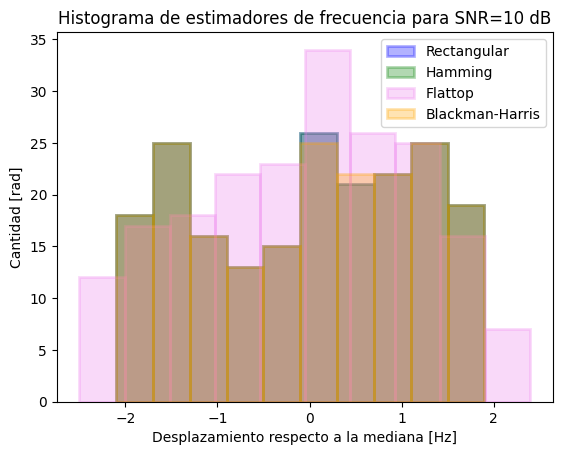

Estimadores de frecuencia con 10 dB de SNR


,Ventana,Sesgo Frecuencia,Varianza Frecuencia
0,Rectangular,0.0300,1.348900
1,Blackman-Harris,0.0310,1.354239
2,Flattop,0.0620,1.468256
3,Hamming,0.0315,1.350858


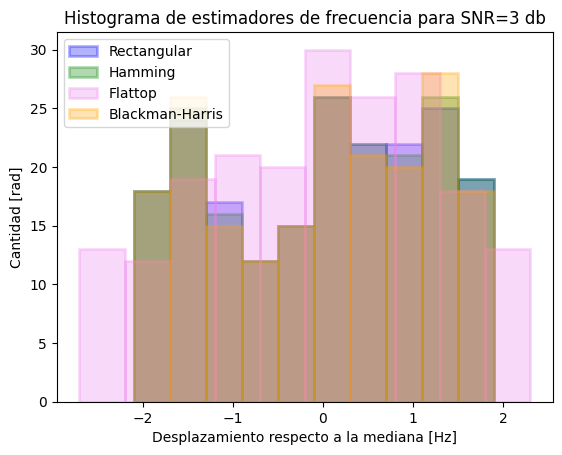

Estimadores de frecuencia con 3 dB de SNR


,Ventana,Sesgo Frecuencia,Varianza Frecuencia
0,Rectangular,0.0315,1.347858
1,Blackman-Harris,0.0305,1.354320
2,Flattop,-0.0035,1.626538
3,Hamming,0.0330,1.351911


In [4]:
# SNR de 10 dB
N_big = 10*N
freqs = np.fft.fftfreq(N_big, 1/fs)

X_m_padded = np.fft.fft(x_m, axis = 0, n = N_big)*(1/N)
Xblack_m_padded = np.fft.fft(xblack_m, axis = 0, n = N_big)*(1/N)
Xfl_m_padded = np.fft.fft(xfl_m, axis = 0, n = N_big)*(1/N)
Xh_m_padded = np.fft.fft(xh_m, axis = 0, n = N_big)*(1/N)

#Frecuencia solo positiva
freq_estimadores = {
    "Rectangular": freqs[np.argmax(np.abs(X_m_padded[:N_big//2,:]), axis=0)],
    "Blackman-Harris": freqs[np.argmax(np.abs(Xblack_m_padded[:N_big//2,:]), axis=0)],
    "Flattop": freqs[np.argmax(np.abs(Xfl_m_padded[:N_big//2,:]), axis=0)],
    "Hamming": freqs[np.argmax(np.abs(Xh_m_padded[:N_big//2,:]), axis=0)],
}

plt.figure()
transp = 0.3
bins = 10
contorno = 2
plt.hist(freq_estimadores["Rectangular"]-np.median(freq_estimadores["Rectangular"]), label='Rectangular', color='blue', alpha=transp, bins=bins, edgecolor='blue', linewidth=contorno)
plt.hist(freq_estimadores["Hamming"]-np.median(freq_estimadores["Hamming"]), label='Hamming', color='green', alpha=transp, bins=bins, edgecolor='green', linewidth=contorno)
plt.hist(freq_estimadores["Flattop"]-np.median(freq_estimadores["Flattop"]), label='Flattop', color='violet', alpha=transp, bins=bins, edgecolor='violet', linewidth=contorno)
plt.hist(freq_estimadores["Blackman-Harris"]-np.median(freq_estimadores["Blackman-Harris"]), label='Blackman-Harris', color='orange', alpha=transp, bins=bins, edgecolor='orange', linewidth=contorno)
plt.title("Histograma de estimadores de frecuencia para SNR=10 dB")
plt.xlabel("Desplazamiento respecto a la mediana [Hz]")
plt.ylabel("Cantidad [rad]")
plt.legend()
plt.show()

# Calcular sesgo y varianza de frecuencia
sesgo_f = {}
varianza_f = {}
f0 = (N/4)  # frecuencia nominal en Hz de omega1
for ventana, datos in freq_estimadores.items():
    sesgo_f[ventana] = np.mean(datos) - f0
    varianza_f[ventana] = np.var(datos)

data_f = []
for ventana in freq_estimadores.keys():
    data_f.append({
        "Ventana": ventana,
        "Sesgo Frecuencia": sesgo_f[ventana],
        "Varianza Frecuencia": varianza_f[ventana]
    })

tabla_f = pd.DataFrame(data_f)
print("Estimadores de frecuencia con 10 dB de SNR")
tabla_f.style.set_table_styles(
    [{'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)
display(tabla_f)

# SNR de 3 dB
X_m2_padded = np.fft.fft(x_m2, axis = 0, n = N_big)*(1/N)
Xblack2_m_padded = np.fft.fft(xblack2_m, axis = 0, n = N_big)*(1/N)
Xfl2_m_padded = np.fft.fft(xfl2_m, axis = 0, n = N_big)*(1/N)
Xh2_m_padded = np.fft.fft(xh2_m, axis = 0, n = N_big)*(1/N)

freq_estimadores2 = {
    "Rectangular": freqs[np.argmax(np.abs(X_m2_padded[:N_big//2,:]), axis=0)],
    "Blackman-Harris": freqs[np.argmax(np.abs(Xblack2_m_padded[:N_big//2,:]), axis=0)],
    "Flattop": freqs[np.argmax(np.abs(Xfl2_m_padded[:N_big//2,:]), axis=0)],
    "Hamming": freqs[np.argmax(np.abs(Xh2_m_padded[:N_big//2,:]), axis=0)],
}

plt.figure()
transp = 0.3
bins = 10
contorno = 2
plt.hist(freq_estimadores2["Rectangular"]-np.median(freq_estimadores2["Rectangular"]), label='Rectangular', color='blue', alpha=transp, bins=bins, edgecolor='blue', linewidth=contorno)
plt.hist(freq_estimadores2["Hamming"]-np.median(freq_estimadores2["Hamming"]), label='Hamming', color='green', alpha=transp, bins=bins, edgecolor='green', linewidth=contorno)
plt.hist(freq_estimadores2["Flattop"]-np.median(freq_estimadores2["Flattop"]), label='Flattop', color='violet', alpha=transp, bins=bins, edgecolor='violet', linewidth=contorno)
plt.hist(freq_estimadores2["Blackman-Harris"]-np.median(freq_estimadores2["Blackman-Harris"]), label='Blackman-Harris', color='orange', alpha=transp, bins=bins, edgecolor='orange', linewidth=contorno)
plt.title("Histograma de estimadores de frecuencia para SNR=3 db")
plt.xlabel("Desplazamiento respecto a la mediana [Hz]")
plt.ylabel("Cantidad [rad]")
plt.legend()
plt.show()

sesgo_f2 = {}
varianza_f2 = {}
for ventana2, datos2 in freq_estimadores2.items():
    sesgo_f2[ventana2] = np.mean(datos2) - f0
    varianza_f2[ventana2] = np.var(datos2)

data_f2 = []
for ventana2 in freq_estimadores2.keys():
    data_f2.append({
        "Ventana": ventana2,
        "Sesgo Frecuencia": sesgo_f2[ventana2],
        "Varianza Frecuencia": varianza_f2[ventana2]
    })

tabla_f2 = pd.DataFrame(data_f2)
print("Estimadores de frecuencia con 3 dB de SNR")
tabla_f2.style.set_table_styles(
    [{'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)
display(tabla_f2)


De esta manera, se percibe lo que ya se había inferido con las tablas y los histogramas anteriores. Al bajar el *SNR*, las diferencias entre las ventanas se hacen más evidentes: las que eran más precisas con poco ruido (como *Flattop*) ahora presentan mayor dispersión, mientras que las más balanceadas (*Blackman-Harris* y *Hamming*) conservan mejor la concentración alrededor de la mediana.